In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('epa-sea-level.csv')

In [3]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.

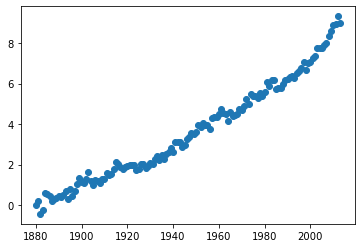

In [5]:
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [6]:
from scipy import stats 

In [7]:
slope,intercept , r,p,se=stats.linregress(df['Year'],df['CSIRO Adjusted Sea Level'])

In [8]:
y=slope*df['Year']+intercept

In [9]:
y

0     -0.542124
1     -0.479079
2     -0.416035
3     -0.352990
4     -0.289946
         ...   
129    7.590627
130    7.653672
131    7.716716
132    7.779761
133    7.842806
Name: Year, Length: 134, dtype: float64

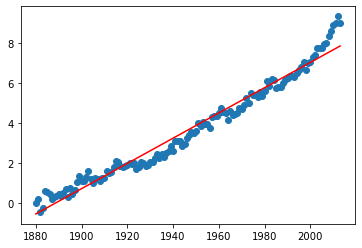

In [10]:
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.plot(df['Year'], y,'r')




In [11]:
s=pd.Series(range(2014,2051))

In [12]:
s

0     2014
1     2015
2     2016
3     2017
4     2018
5     2019
6     2020
7     2021
8     2022
9     2023
10    2024
11    2025
12    2026
13    2027
14    2028
15    2029
16    2030
17    2031
18    2032
19    2033
20    2034
21    2035
22    2036
23    2037
24    2038
25    2039
26    2040
27    2041
28    2042
29    2043
30    2044
31    2045
32    2046
33    2047
34    2048
35    2049
36    2050
dtype: int64

In [13]:
df1=df["Year"].append(s)


In [14]:
df1

0     1880
1     1881
2     1882
3     1883
4     1884
      ... 
32    2046
33    2047
34    2048
35    2049
36    2050
Length: 171, dtype: int64

In [15]:
y=slope*df1+intercept

In [16]:
y

0     -0.542124
1     -0.479079
2     -0.416035
3     -0.352990
4     -0.289946
        ...    
32     9.923277
33     9.986322
34    10.049366
35    10.112411
36    10.175455
Length: 171, dtype: float64

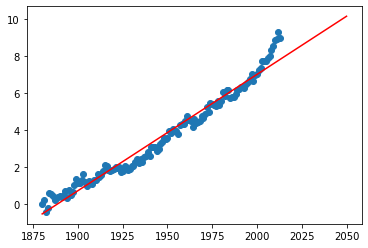

In [17]:
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.plot(df1, y,'r')

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [18]:
df2=df[df['Year']>=2000]
df3=df2["Year"].append(s)

In [19]:
slope,intercept , r,p,se=stats.linregress(df2['Year'],df2['CSIRO Adjusted Sea Level'])

In [20]:
y1=slope*df3+intercept

Text(0.5, 1.0, 'Rise in Sea Level')

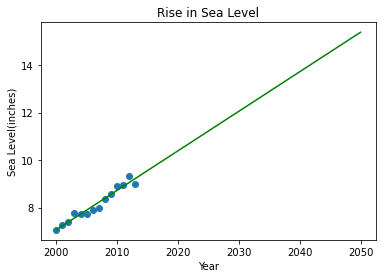

In [21]:
plt.scatter(df2['Year'],df2['CSIRO Adjusted Sea Level'])
plt.plot(df3, y1,'g')
plt.xlabel("Year")
plt.ylabel("Sea Level(inches)")
plt.title('Rise in Sea Level')



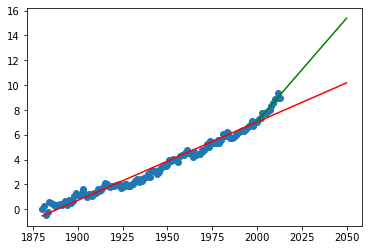

In [22]:
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])
plt.plot(df1, y,'r')
plt.plot(df3, y1,'g')
